In [1]:
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

from sage.visualization.vistool_pipeline import VisTool
from sage.visualization.visual_utils import plot_vismap, Assembled

This run_pretrains_single function is no longer supported since version=0.2
This run_dataloader function is no longer supported since version=0.2
This run_pretrains_dataloader function is no longer supported since version=0.2


In [69]:
from sage.config import load_config
from sage.training.trainer import MRITrainer

cfg = load_config()
cfg.batch_size = 1
cfg.partial = .05

# cfg.encoder = {
#     'name': 'resnet',
#     'config': {
#         'start_channels': 32
#     }
# }

trainer = MRITrainer(cfg)

Use cuda:0 as a device.
Output from encoder is 128.
Total Number of parameters: 905549
TOTAL TRAIN 57 | VALID 15
MIXED PRECISION:: True


In [70]:
encoder = trainer.models['encoder']
regressor = trainer.models['regressor']
del trainer

import torch
torch.cuda.empty_cache()

In [4]:
model = Assembled(encoder, regressor)

PREFIX = 'G:/My Drive/brain_data/workspace/result/models/20210814-1815/'
SUFFIX = 'ep159_mae6.28.pt'

weight = {
    'encoder': f"{PREFIX}/encoder/{SUFFIX}",
    'regressor': f"{PREFIX}/regressor/{SUFFIX}",
}

In [5]:
gcam = VisTool(cfg, model, cam_type='gcam')

Weights successfully loaded!
Weights successfully loaded!
[true] 22 [pred] 25.240


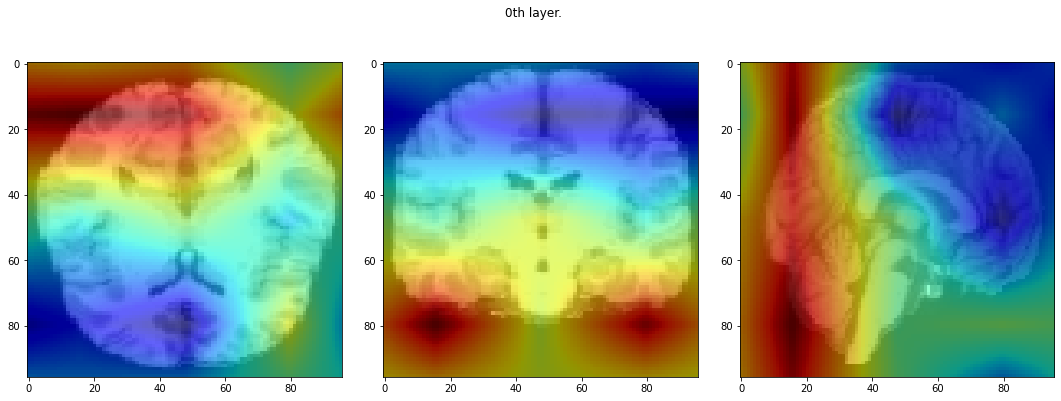

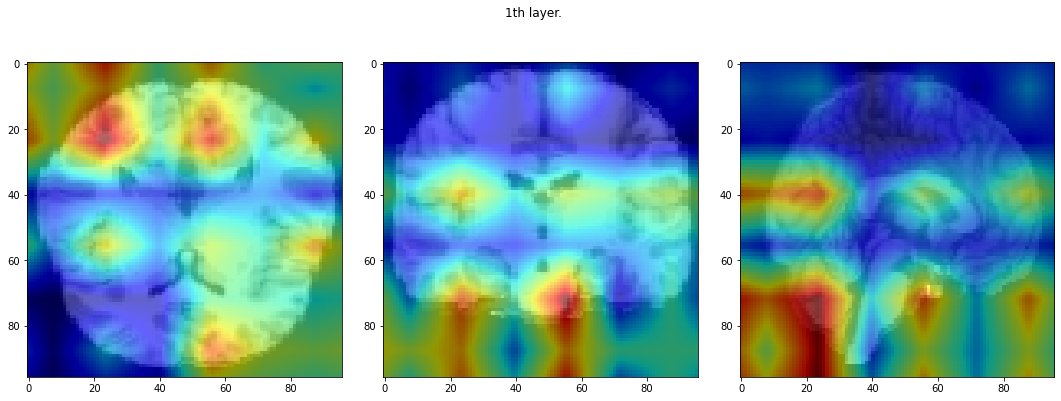

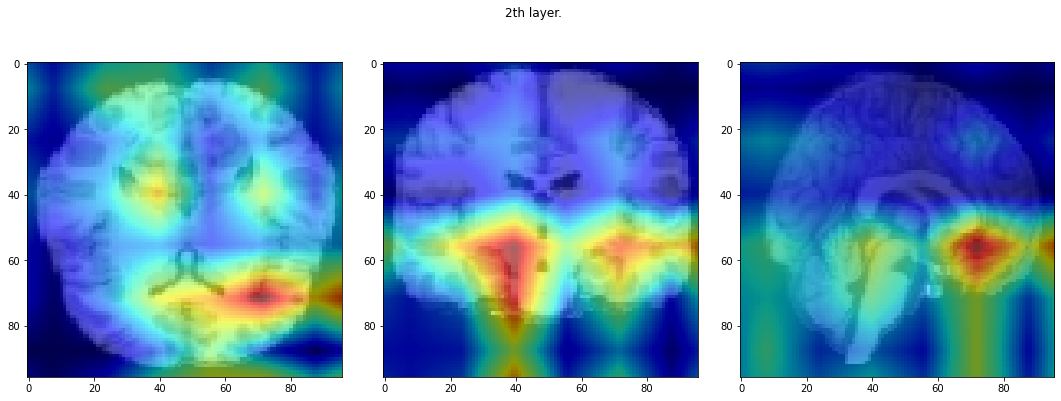

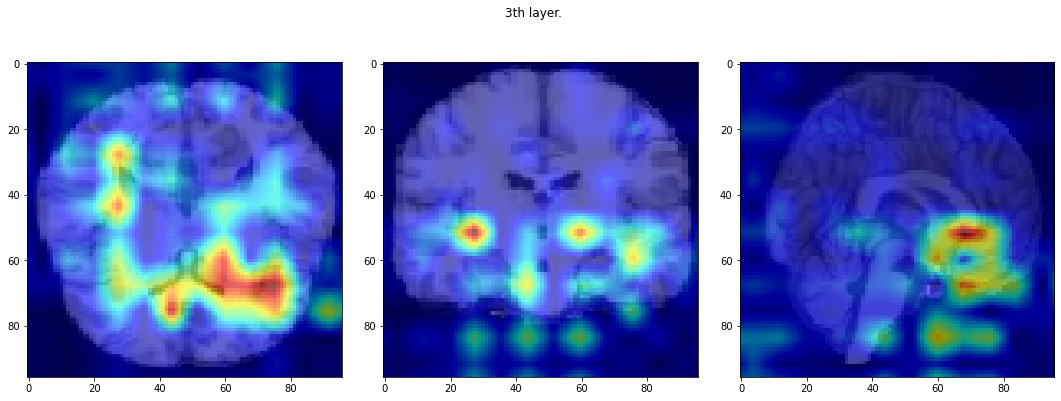

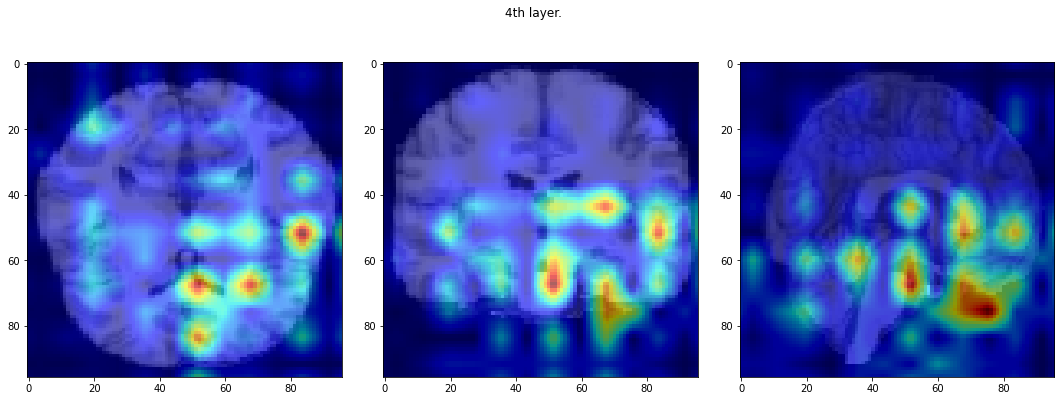

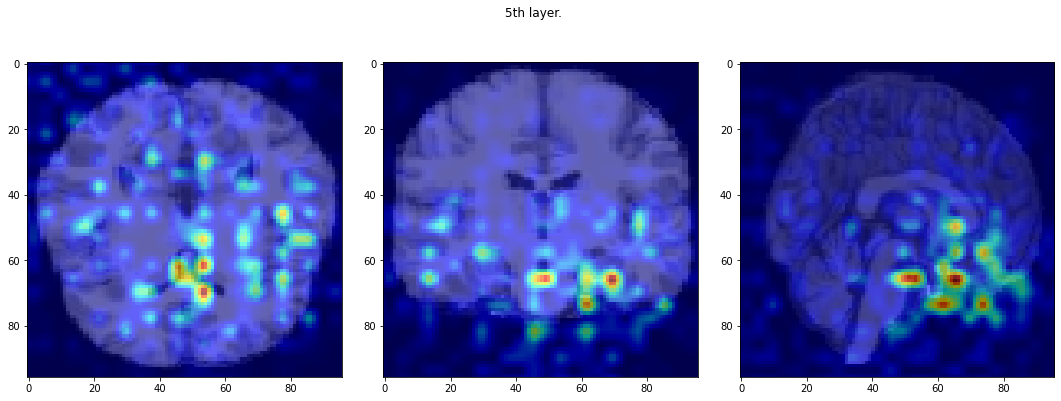

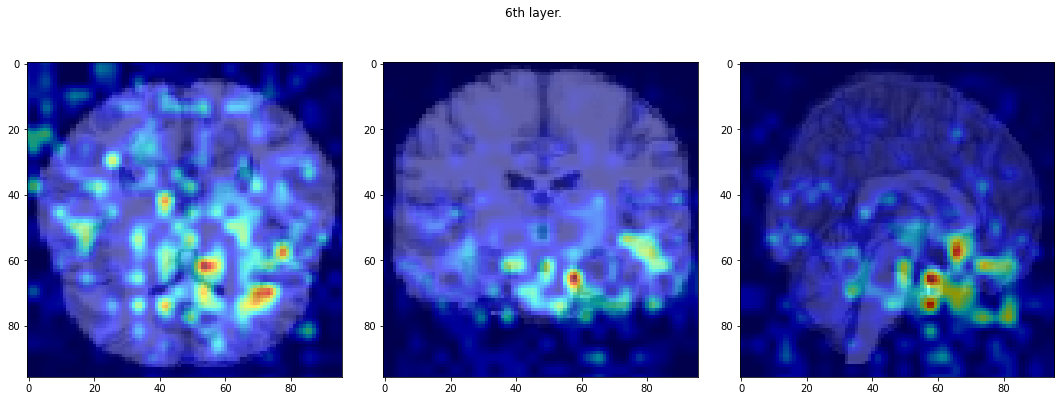

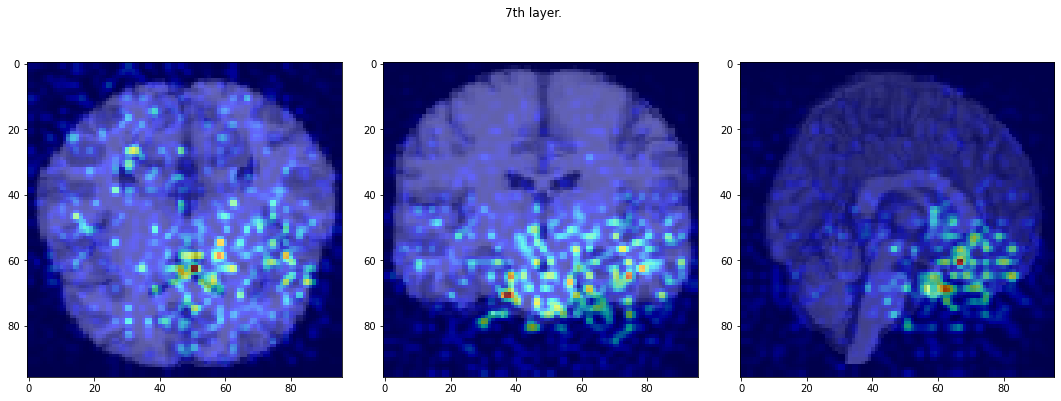

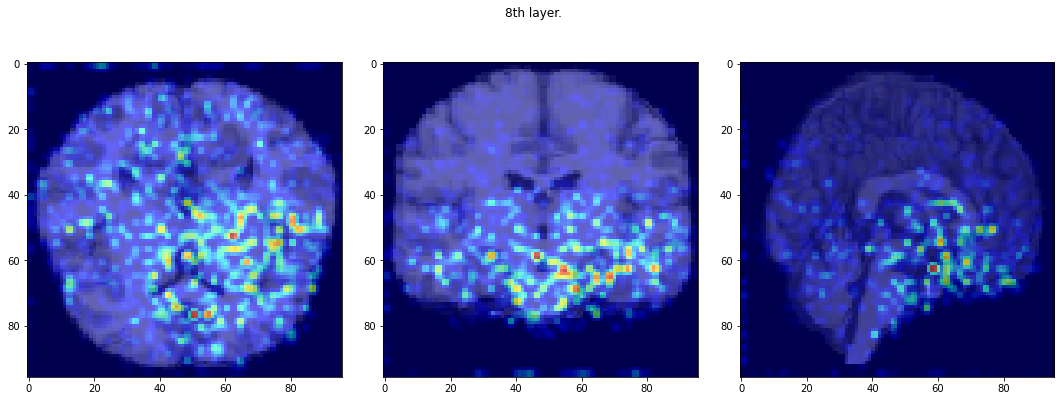

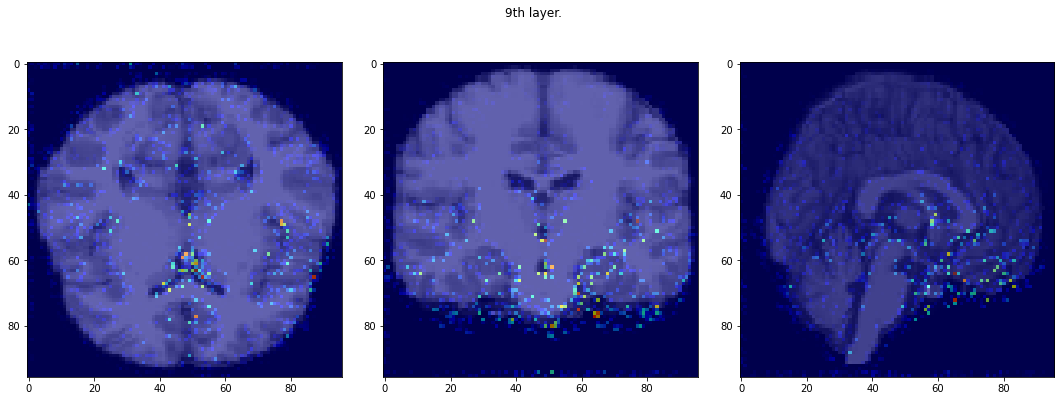

In [6]:
from sage.data.dataloader import get_dataloader

train_dataloader = get_dataloader(cfg, test=False)
valid_dataloader = get_dataloader(cfg, test=True)

batch = next(iter(train_dataloader))
x, y, _ = batch

vismap = gcam(x, y, weight=weight, visualize=True)

In [ ]:
vismap = gcam(dataloader=valid_dataloader, prefix=PREFIX, visualize=True)

In [104]:
class A:
    
    def __init__(self):
        pass
    
    def __str__(self):
        return 'string'
    
    def __repr__(self):
        return 'representation'

In [105]:
a = A()

In [106]:
a

representation

In [107]:
str(a)

'string'